# 사전 준비

## 구글 드라이브 마운트

1) 왼쪽의 네 개 아이콘 중, 맨 아래 아이콘 클릭해,

2) Google Drive 아이콘 클릭하여, Google Drive를 마운트합니다.

In [ ]:
import os
base_gdrive_path = 'drive/MyDrive/today_lecture'

# base_gdrive_path = os.path.join('drive', 'MyDrive', 'today_lecture')

# Imports

In [ ]:
# TensorFlow 및 tf.keras
import tensorflow as tf
from tensorflow import keras

# 도움 라이브러리
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


# CIFAR 100

## 데이터 다운 및 분석

In [ ]:
print("트레이닝 이미지 shape: {}, dtype: {}".format(train_images.shape, train_images.dtype))
print("트레이닝 라벨 shape: {}, dtype: {}".format(train_labels.shape, train_labels.dtype))

트레이닝 이미지 shape: (50000, 32, 32, 3), dtype: uint8
트레이닝 라벨 shape: (50000, 1), dtype: int64


In [ ]:
# 각 숫자의 개수

In [ ]:
print("테스트 이미지 shape: {}, dtype: {}".format(test_images.shape, test_images.dtype))
print("테스트 라벨 shape: {}, dtype: {}".format(test_labels.shape, test_labels.dtype))

테스트 이미지 shape: (10000, 32, 32, 3), dtype: uint8
테스트 라벨 shape: (10000, 1), dtype: int64


## 데이터 전처리

샘플 데이터 하나 살펴보기

데이터를 비율로 변경. 트레이닝을 더 잘 시키기 위함

binary cmap으로 트레이닝 이미지 여러 개 살펴보기

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


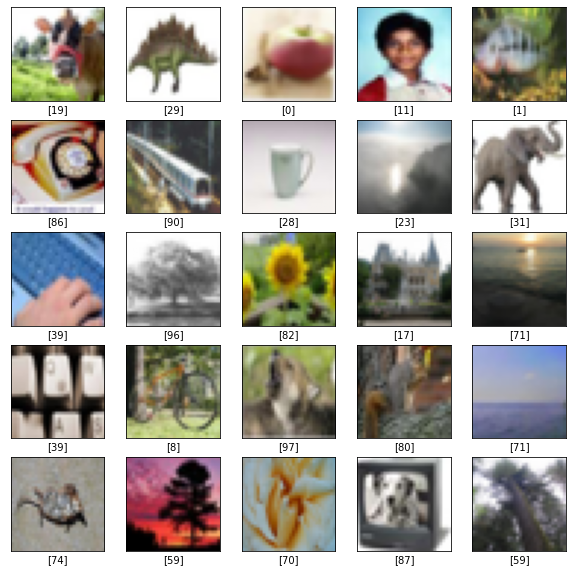

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])
plt.show()

# ResNet

## 모델 (34-layer-residual)

In [ ]:
def resnet_34(input_shape = (224, 224, 3), class_num = 1000):
    


In [ ]:
model = resnet_34()
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_195 (Conv2D)             (None, 112, 112, 32) 4736        input_13[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_22 (MaxPooling2D) (None, 56, 56, 32)   0           conv2d_195[0][0]                 
__________________________________________________________________________________________________
conv2d_196 (Conv2D)             (None, 56, 56, 32)   9248        max_pooling2d_22[0][0]           
____________________________________________________________________________________________

In [ ]:
model = resnet_34(input_shape=(32, 32, 3), class_num=100)
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_231 (Conv2D)             (None, 16, 16, 32)   4736        input_14[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_26 (MaxPooling2D) (None, 8, 8, 32)     0           conv2d_231[0][0]                 
__________________________________________________________________________________________________
conv2d_232 (Conv2D)             (None, 8, 8, 32)     9248        max_pooling2d_26[0][0]           
____________________________________________________________________________________________

## 트레이닝

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 65s 40ms/step - loss: 4.1809 - sparse_categorical_accuracy: 0.0486
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 3.5344 - sparse_categorical_accuracy: 0.1490
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 3.2038 - sparse_categorical_accuracy: 0.2091
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 3.0024 - sparse_categorical_accuracy: 0.2509
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 2.8489 - sparse_categorical_accuracy: 0.2800
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 2.7201 - sparse_categorical_accuracy: 0.3036
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 2.6024 - sparse_categorical_accuracy: 0.3252
Epoch 8/10
1563/1563 [==============================] - 62s 40ms/step - loss: 2.5000 - sparse_categorical_accuracy: 0.3478
Epoch 9/10
1563/

## 테스트 및 예측

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('테스트 정확도:', test_acc)

313/313 - 5s - loss: 2.8410 - sparse_categorical_accuracy: 0.3084
테스트 정확도: 0.3084000051021576


### 예측 보기

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)
  
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(100))
  plt.yticks([])
  thisplot = plt.bar(range(100), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
predictions = model.predict(test_images)

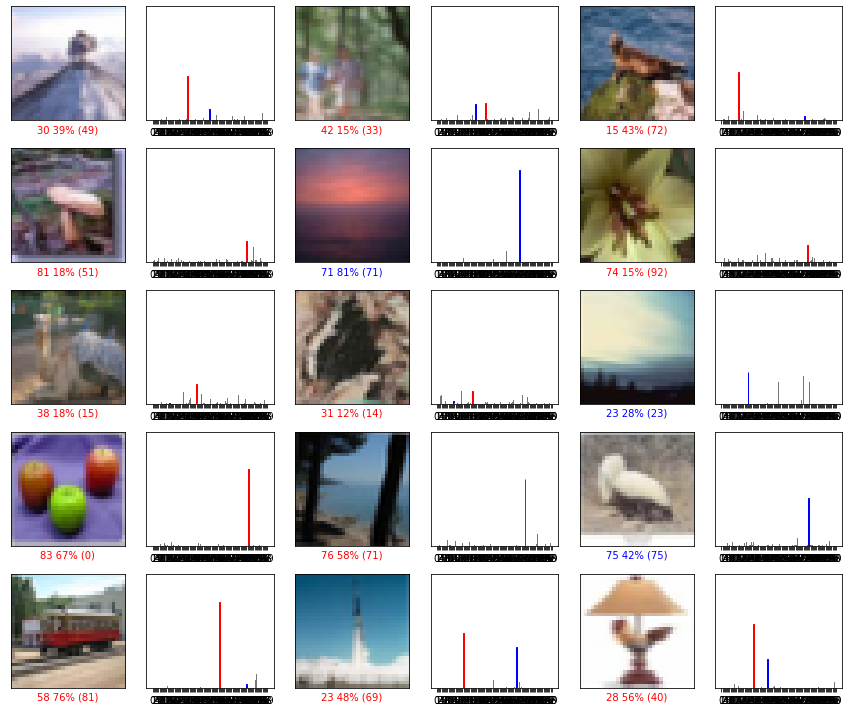

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
test_labels_2 = list(map(lambda el: el[0], test_labels))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels_2, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels_2)
plt.tight_layout()
plt.show()